Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=hPZifBNzCKA&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=12

# Text Data Analytics (News Groups)

In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
def text_clean(df, txt_col='text_clean',
                stopwords_list = stopwords.words('english')):
    stopwords_list = stopwords.words('english')
    text_list=df[txt_col].tolist()
    text_list_processed=[]
    for text in text_list:
        text=text.lower()
        text=re.sub(r'[\.\,\?\:\;\!\-\'\"]','',text)
        text=re.sub(r'\d+','',text)
        words=re.split(r'\W+', text)
        words=[x for x in words if not x in stopwords_list]
        text=' '.join(words)
        text_list_processed.append(text)
    df[txt_col]=text_list_processed
    return(df)

In [5]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [6]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [7]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
newsgroups_train['target'][:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [9]:
[newsgroups_train['target_names'][x] for x in newsgroups_train['target'][:30]]

['rec.autos',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'comp.graphics',
 'sci.space',
 'talk.politics.guns',
 'sci.med',
 'comp.sys.ibm.pc.hardware',
 'comp.os.ms-windows.misc',
 'comp.sys.mac.hardware',
 'rec.motorcycles',
 'talk.religion.misc',
 'comp.sys.mac.hardware',
 'sci.space',
 'misc.forsale',
 'alt.atheism',
 'comp.graphics',
 'rec.autos',
 'sci.electronics',
 'comp.windows.x',
 'alt.atheism',
 'rec.sport.hockey',
 'misc.forsale',
 'comp.os.ms-windows.misc',
 'comp.sys.mac.hardware',
 'comp.graphics',
 'sci.electronics',
 'rec.sport.baseball',
 'soc.religion.christian',
 'rec.autos']

In [10]:
print(newsgroups_train['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [11]:
newsgroups_train['data'][:3]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [12]:
target_names = newsgroups_train['target_names']
target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
newsgroups_train['target'][:3]

array([7, 4, 4])

In [14]:
train_df=pd.DataFrame({'text':newsgroups_train['data'], 'target':newsgroups_train['target']})
test_df=pd.DataFrame({'text':newsgroups_test['data'], 'target':newsgroups_test['target']})
train_df.head()

text  target
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14

In [15]:
train_df.target.value_counts()

10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target, dtype: int64

In [33]:
n_features = 30000
vectorizer = TfidfVectorizer(max_df=0.8, max_features=n_features, ngram_range=(1, 2),
                                 min_df=1, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])
feature_names = vectorizer.get_feature_names()
feature_names = np.asarray(feature_names)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


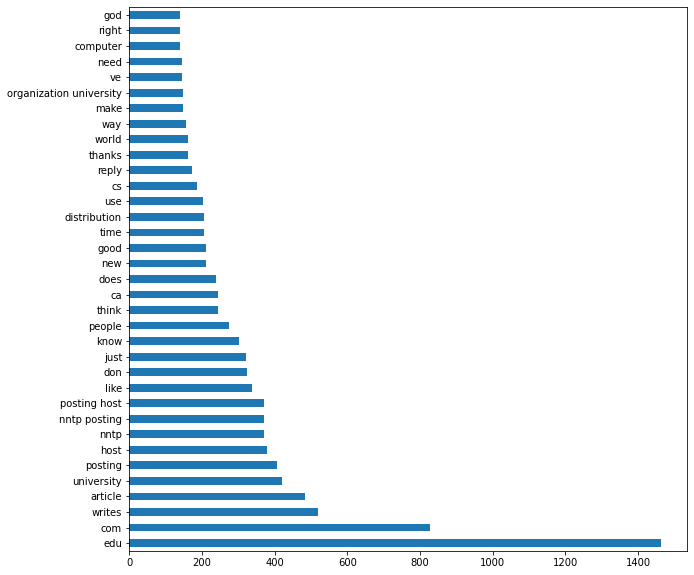

In [23]:
feat_freq=X_train.toarray().sum(axis=0)
feat_freq=pd.Series(feat_freq,index=feature_names).sort_values(ascending=False)
_=feat_freq[0:35].plot(kind='barh',figsize=(10,10),title='')

In [25]:
feature_names

array(['00', '00 00', '00 gmt', ..., 'zv', 'zx', 'zx 11'], dtype='<U80')

In [34]:
y_train = train_df.target.values
y_test = test_df.target.values

In [35]:
clf=RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [36]:
_=clf.fit(X_train, y_train)

In [37]:
pred = clf.predict(X_test)

In [38]:
acc_score = metrics.accuracy_score(y_test, pred)
acc_score

0.7813329792883696

In [39]:
print(metrics.classification_report(y_test, pred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.62      0.69       319
           comp.graphics       0.63      0.70      0.66       389
 comp.os.ms-windows.misc       0.70      0.81      0.75       394
comp.sys.ibm.pc.hardware       0.67      0.66      0.66       392
   comp.sys.mac.hardware       0.77      0.78      0.77       385
          comp.windows.x       0.80      0.71      0.75       395
            misc.forsale       0.81      0.89      0.85       390
               rec.autos       0.85      0.83      0.84       396
         rec.motorcycles       0.90      0.89      0.90       398
      rec.sport.baseball       0.83      0.90      0.86       397
        rec.sport.hockey       0.89      0.90      0.90       399
               sci.crypt       0.90      0.89      0.89       396
         sci.electronics       0.63      0.60      0.61       393
                 sci.med       0.83      0.77      0.80       396
         

In [40]:
X_train.shape, X_test.shape

((11314, 30000), (7532, 30000))

In [41]:
n_clusters=20
clust = KMeans(n_clusters=n_clusters, random_state=10)
_=clust.fit(X_train)

In [42]:
train_df['clust']=clust.labels_

In [43]:
train_df['target_name']=[target_names[i] for i in train_df['target']]

In [44]:
for i in range(n_clusters):
    print(f'\nCluster {i}')
    print(train_df.loc[train_df.clust==i,'target_name'].value_counts()[:5])


Cluster 0
sci.space          121
sci.electronics     20
rec.motorcycles     17
comp.windows.x      16
sci.med             15
Name: target_name, dtype: int64

Cluster 1
talk.politics.guns    322
talk.politics.misc    110
sci.crypt               7
talk.religion.misc      6
misc.forsale            4
Name: target_name, dtype: int64

Cluster 2
rec.sport.baseball       93
comp.sys.mac.hardware    22
sci.electronics          18
talk.politics.guns       17
misc.forsale             16
Name: target_name, dtype: int64

Cluster 3
rec.sport.hockey    494
rec.motorcycles     465
rec.autos           460
misc.forsale        421
sci.med             419
Name: target_name, dtype: int64

Cluster 4
rec.sport.hockey          45
rec.autos                 35
sci.space                 32
soc.religion.christian    28
rec.sport.baseball        23
Name: target_name, dtype: int64

Cluster 5
sci.space             50
talk.religion.misc    39
alt.atheism           21
sci.electronics        9
Name: target_name, dtype

In [45]:
n_comp=300
svd = TruncatedSVD(n_components=n_comp, n_iter=10, random_state=10)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.transform(X_test)

In [46]:
X_train_svd.shape, X_test_svd.shape

((11314, 300), (7532, 300))

In [47]:
clf=RandomForestClassifier(n_estimators=300, n_jobs=-1)
_=clf.fit(X_train_svd, y_train)
pred = clf.predict(X_test_svd)
print(metrics.classification_report(y_test, pred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.66      0.72       319
           comp.graphics       0.53      0.66      0.59       389
 comp.os.ms-windows.misc       0.69      0.68      0.69       394
comp.sys.ibm.pc.hardware       0.62      0.58      0.60       392
   comp.sys.mac.hardware       0.67      0.66      0.66       385
          comp.windows.x       0.70      0.64      0.67       395
            misc.forsale       0.66      0.77      0.71       390
               rec.autos       0.73      0.74      0.74       396
         rec.motorcycles       0.84      0.84      0.84       398
      rec.sport.baseball       0.78      0.82      0.80       397
        rec.sport.hockey       0.84      0.88      0.86       399
               sci.crypt       0.90      0.82      0.86       396
         sci.electronics       0.51      0.45      0.48       393
                 sci.med       0.62      0.66      0.64       396
         

In [53]:
search_string='sport football'

In [59]:
search_string='computer intel'

In [60]:
search_string_vector=vectorizer.transform([search_string])
search_string_vector.shape

(1, 30000)

In [55]:
sim_tfidf = cosine_similarity(search_string_vector, X_train)[0]
train_df['sim_tfidf']=sim_tfidf 

In [56]:
sim_df=train_df[['text','sim_tfidf']].sort_values('sim_tfidf',ascending=False).copy()
for i in sim_df.index[:10]:
    print('\n',sim_df.loc[i,'text'],'\n','-'*50)


 From: jrogoff@scott.skidmore.edu (jay rogoff)
Subject: Re: New Home for the Bosox!!!
Organization: Skidmore College, Saratoga Springs NY
Lines: 19


> I agree, though I'd also be happy with a stadium that looks
> like new Comiskey. The new park was also made for baseball.
> Unlike Three Rivers, the Vet, Riverfront, etc., it's not a
> football park in which they also play baseball.
 
While we're on the multipurpose subject, let's not forget Shea, which
was designed to accommodate both the Mets & Jets.  It was the first
stadium (I think) to have the box seats on rollers so they could be
oriented at right angles for baseball & in parallel for football.

Of course, with the Jets gone to Jersey (and a truly good football
stadium), the Mets are saddled with a multipurpose stadium where,
because it's circular, the seats are almost always too far from the
action.  The Mets announcers--Kiner & Murphy in particular--have
always hyped it as "beautiful Shea
Stadium," a tipoff to how unbeautiful 

In [61]:
search_string_vector_svd=svd.transform(search_string_vector)

In [62]:
sim_tfidf_svd = cosine_similarity(search_string_vector_svd, X_train_svd)[0]
train_df['sim_tfidf_svd']=sim_tfidf_svd

sim_svd_df=train_df[['text','sim_tfidf_svd']].sort_values('sim_tfidf_svd',ascending=False).copy()
for i in sim_svd_df.index[:10]:
    print('\n',sim_svd_df.loc[i,'text'])


 From: scotts@bbking.FtCollinsCO.NCR.COM ( Scott Sherman)
Subject: Re: Computer Engr vs.  Computer Science
Distribution: usa
Organization: NCR Microelectronics Products Division (an AT&T Company)
Lines: 20

In article <1993Apr10.210242.340@macadam.com>, mike@macadam.com writes:
|> I am a freshman in college and can't decide whether to major in computer  
|> engineering or computer science.  Any advice or suggestions will be  
|> appreciated.
|> 
|> Thanks,
|> Mike

A professor of mine once said "The difference between a Computer Engineer and
a Computer Scientist is about $5000" meaning the Engineer makes $5000 more than
the CS.
Seriously though the main difference is that most CS people write programs that
people will use, i.e. database, graphics, word processors, etc., while an
engineer writes for machines or control systems, i.e. the "computer" in your
car, a flight control system, computer controled devices, etc. In other words
CS writes SOFTWARE while CSE writes FIRMWARE. 
These a